In [1]:
import pandas as pd
dataset = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(dataset.head(5))

obj = dataset.dtypes == "object"
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = dataset.dtypes == "int64"
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = dataset.dtypes == "float64"
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Categorical variables: 4
Integer variables: 6
Float variables: 3


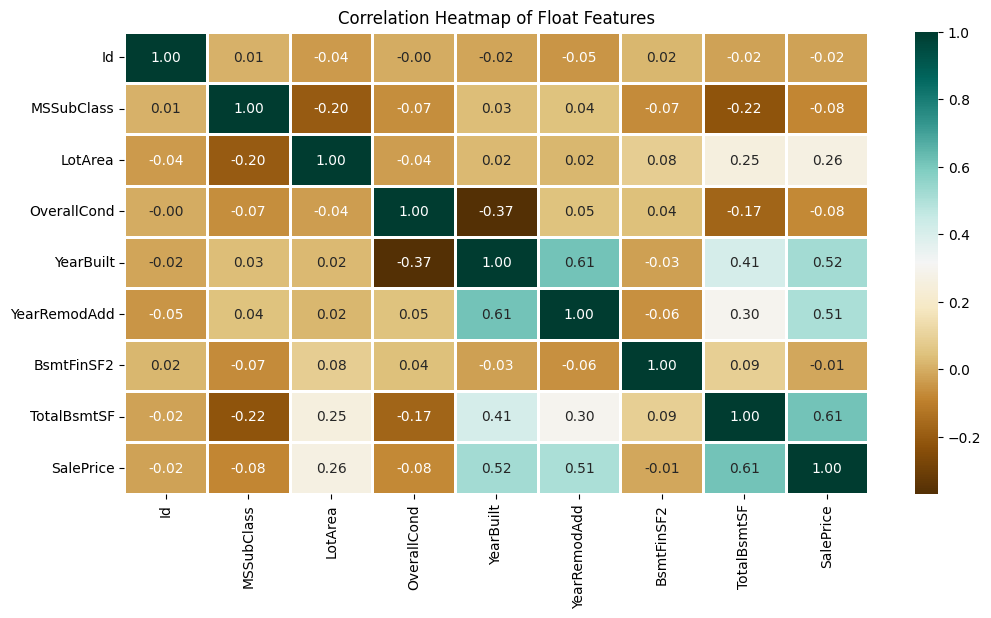

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# merge num_cols with fl_cols
merged_cols = num_cols + fl_cols

# Compute the correlation matrix for float columns
corr = dataset[merged_cols].corr()


# Draw the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="BrBG", linewidths=2, fmt=".2f")
plt.title("Correlation Heatmap of Float Features")
plt.show()

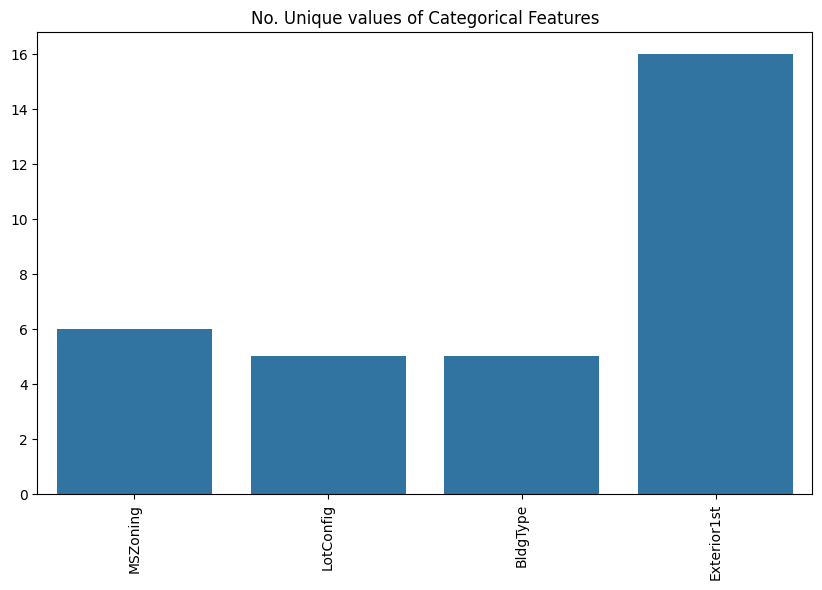

In [3]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10, 6))
plt.title("No. Unique values of Categorical Features")
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)
plt.show()

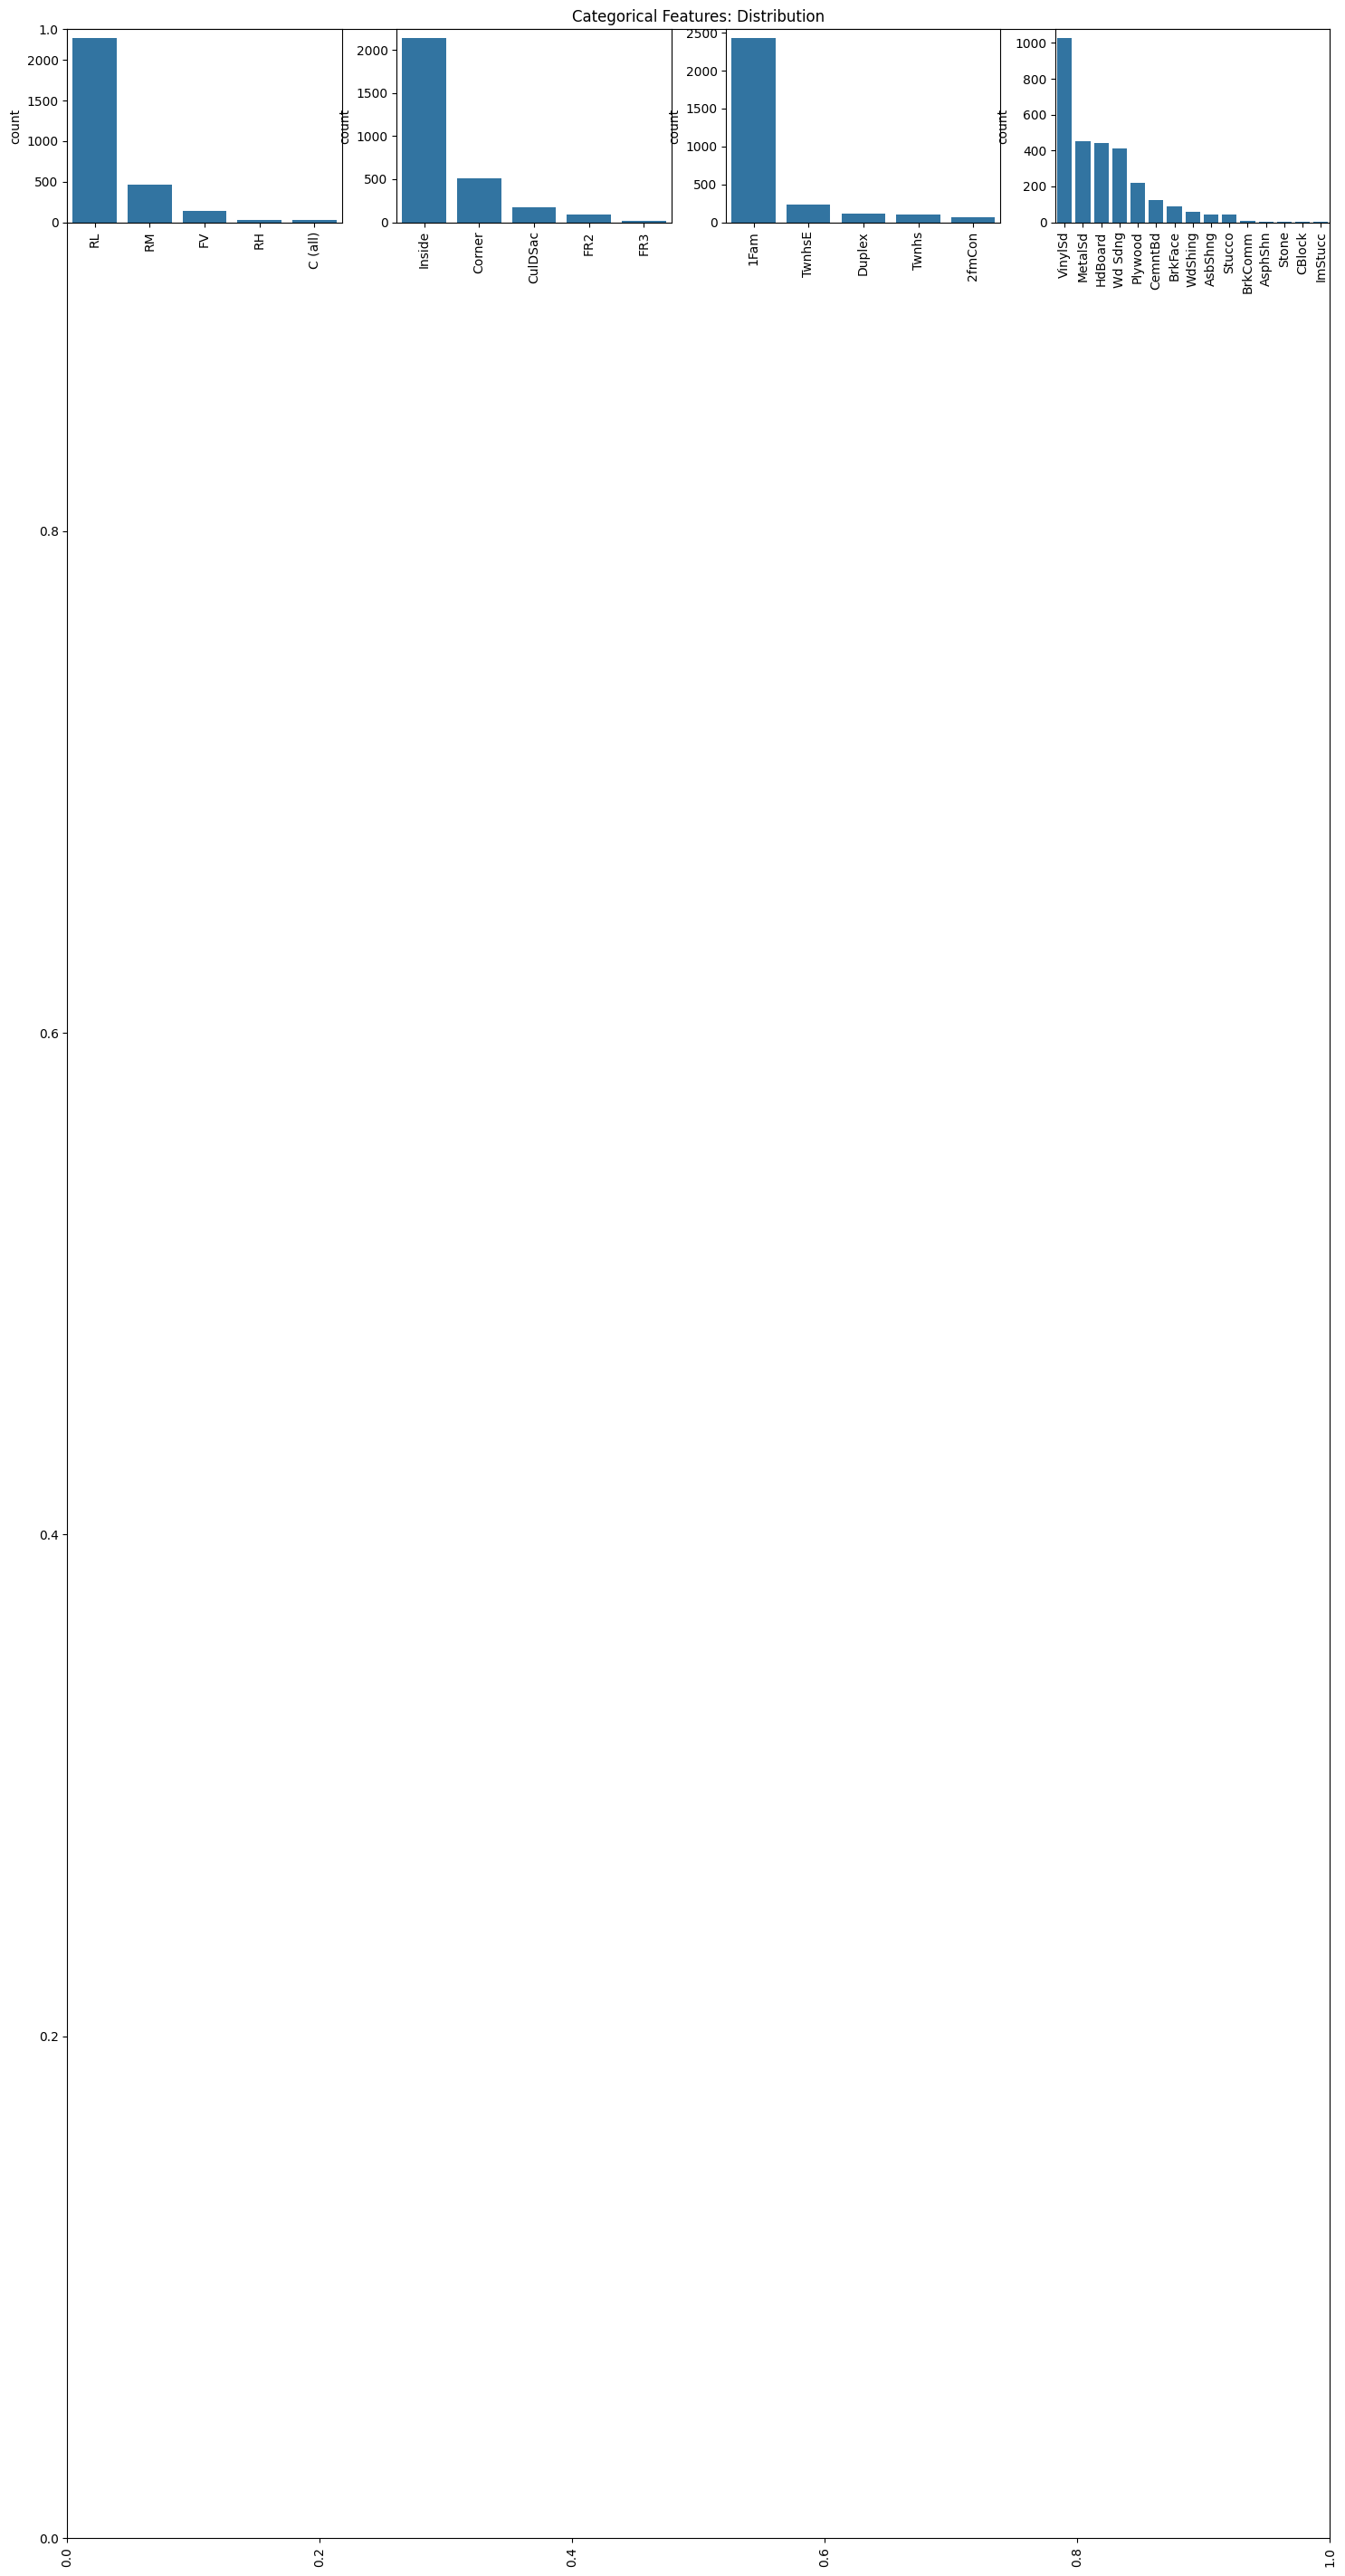

In [4]:
plt.figure(figsize=(18, 36))
plt.title("Categorical Features: Distribution")
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
plt.show()

In [5]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

dataset.drop(["Id"], axis=1, inplace=True)

dataset["SalePrice"] = dataset["SalePrice"].fillna(dataset["SalePrice"].mean())

new_dataset = dataset.dropna()
new_dataset.isnull().sum()

s = new_dataset.dtypes == "object"
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print("No. of. categorical features: ", len(object_cols))

# apply OneHotEncoding to the whole list of categorical features
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
num_dataset = new_dataset.drop(object_cols, axis=1)
OH_dataset = pd.concat([num_dataset, OH_cols], axis=1)

# Split the training set into
# training and validation set
X = OH_dataset.drop("SalePrice", axis=1)
Y = OH_dataset["SalePrice"]

X.columns = X.columns.astype(str)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0
)

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print("Random Forest Regressor: {}".format(mean_absolute_percentage_error(Y_valid, Y_pred)))


from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print("Linear Regression: {}".format(mean_absolute_percentage_error(Y_valid, Y_pred)))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4
Random Forest Regressor: 0.18727970824930848
Linear Regression: 0.18741683841599902
